In [18]:
%pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd

df = pd.read_csv('mercadolibre_items.csv')

df.head()

,id,site_id,title,seller_id,category_id,official_store_id,price,base_price,original_price,currency_id,...,thumbnail,video_id,accepts_mercadopago,warranty,catalog_product_id,domain_id,date_created,last_updated,status,catalog_listing
0,MLA918072516,MLA,Google Nest Mini Nest Mini 2nd Gen Con Asisten...,119914491,MLA409415,NaN,66490.50,66490.50,69990.0,ARS,...,http://http2.mlstatic.com/D_748685-MLA45255603...,NaN,True,Garantía del vendedor: 6 meses,MLA15541143,MLA-SMART_SPEAKERS,2021-04-26T19:22:18.000Z,2024-05-31T02:14:20.000Z,active,True
1,MLA934111387,MLA,Google Nest Hub Con Asistente Virtual Google A...,284824585,MLA409415,NaN,225693.90,225693.90,369990.0,ARS,...,http://http2.mlstatic.com/D_774989-MLA43070779...,NaN,True,Garantía del vendedor: 6 meses,MLA15532616,MLA-SMART_SPEAKERS,2021-08-12T21:07:18.000Z,2024-05-30T02:48:54.596Z,active,True
2,MLA1429485397,MLA,Google Nest Hub Con Asistente Virtual Google A...,119914491,MLA409415,NaN,237499.05,237499.05,249999.0,ARS,...,http://http2.mlstatic.com/D_740239-MLA43071191...,NaN,True,Garantía del vendedor: 3 meses,MLA15532617,MLA-SMART_SPEAKERS,2024-05-29T17:26:50.417Z,2024-05-30T20:02:45.965Z,active,True
3,MLA1146279904,MLA,Google Home Mini Con Asistente Virtual Google ...,309453406,MLA409415,NaN,69591.30,69591.30,79990.0,ARS,...,http://http2.mlstatic.com/D_747055-MLA51559102...,NaN,True,Garantía del vendedor: 6 meses,MLA15541917,MLA-SMART_SPEAKERS,2022-07-09T21:58:24.000Z,2024-05-30T02:58:52.078Z,active,True
4,MLA1376911913,MLA,Google Home Mini Con Asistente Virtual Google ...,56599171,MLA409415,NaN,128999.00,128999.00,NaN,ARS,...,http://http2.mlstatic.com/D_925569-MLU72639569...,NaN,True,Garantía del vendedor: 6 meses,MLA15541916,MLA-SMART_SPEAKERS,2023-07-12T23:49:14.000Z,2024-05-24T20:20:59.000Z,active,True


# Estadísticas descriptivas

In [20]:
df.describe()


,seller_id,official_store_id,price,base_price,original_price,initial_quantity,video_id
count,1.500000e+01,0.0,15.000000,15.000000,5.000000,15.000000,0.0
mean,4.712438e+08,NaN,197027.383333,197027.383333,168593.800000,649.400000,NaN
std,4.637488e+08,NaN,160521.946241,160521.946241,135921.625679,662.739423,NaN
min,6.805150e+05,NaN,66490.500000,66490.500000,69990.000000,1.000000,NaN
25%,1.199145e+08,NaN,76649.500000,76649.500000,73000.000000,101.000000,NaN
50%,3.094534e+08,NaN,128999.000000,128999.000000,79990.000000,201.000000,NaN
75%,6.755075e+08,NaN,254990.000000,254990.000000,249999.000000,1001.500000,NaN
max,1.473287e+09,NaN,640200.000000,640200.000000,369990.000000,1935.000000,NaN


# Distribución de Precios

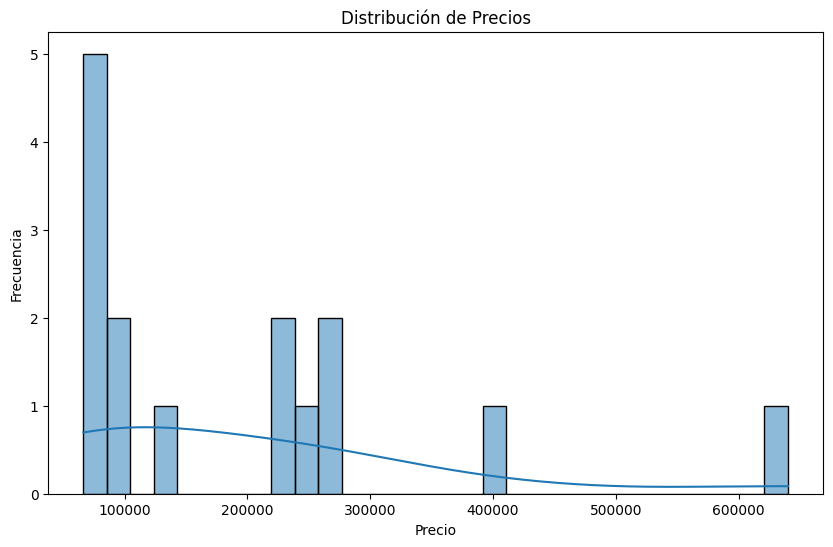

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


# Cantidad Disponible por Condición

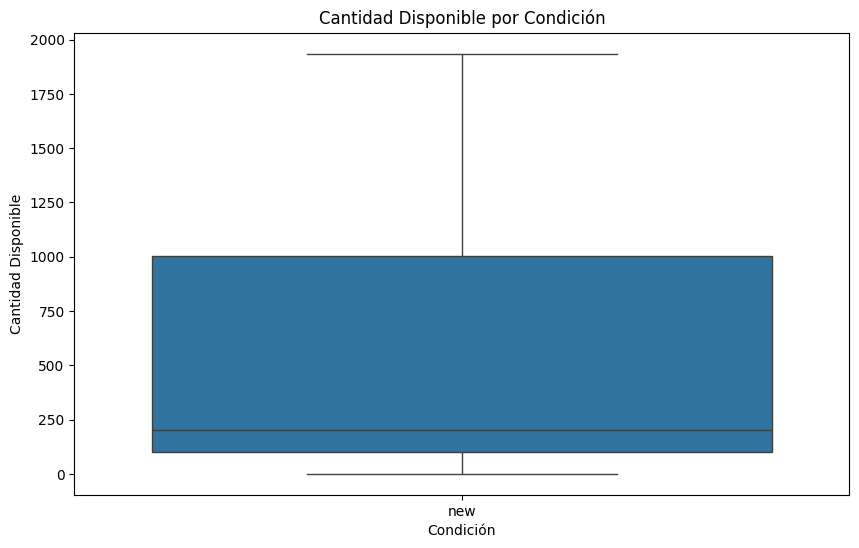

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='initial_quantity', data=df)
plt.title('Cantidad Disponible por Condición')
plt.xlabel('Condición')
plt.ylabel('Cantidad Disponible')
plt.show()


# Cantidad inicial por tipo de dispositivo

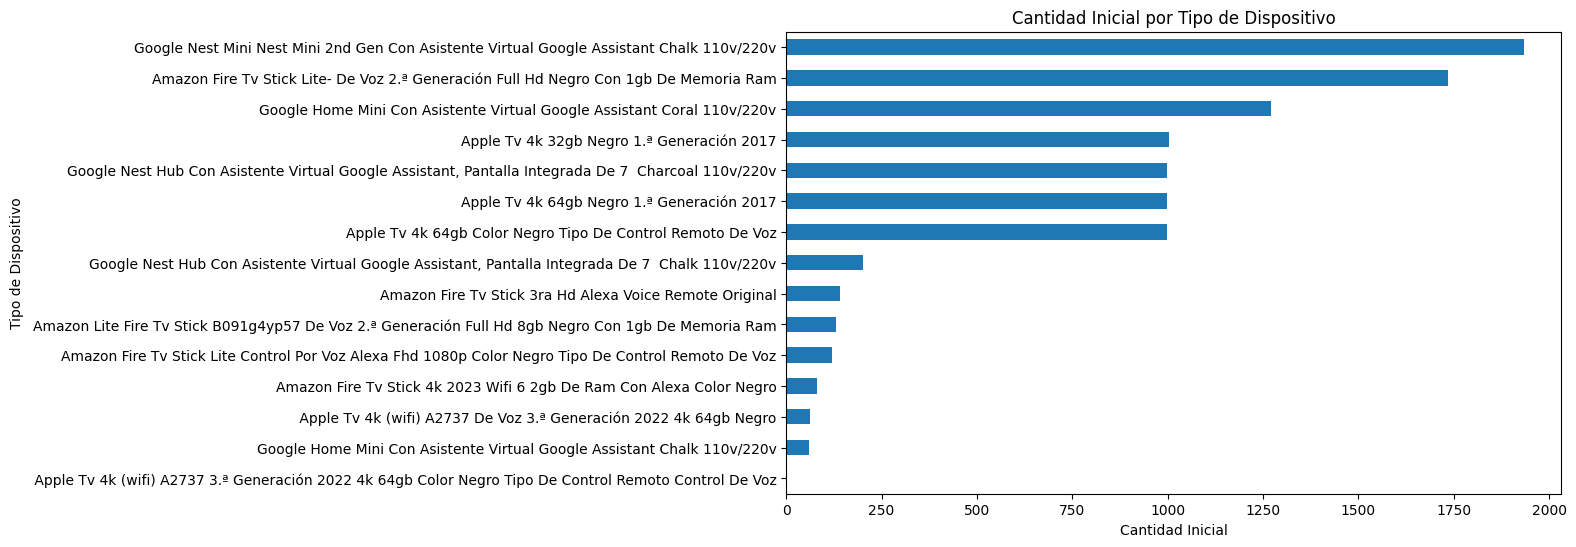

In [7]:
plt.figure(figsize=(10, 6))
df.groupby('title')['initial_quantity'].sum().sort_values().plot(kind='barh')
plt.title('Cantidad Inicial por Tipo de Dispositivo')
plt.xlabel('Cantidad Inicial')
plt.ylabel('Tipo de Dispositivo')
plt.show()


# Análisis de Correlaciones


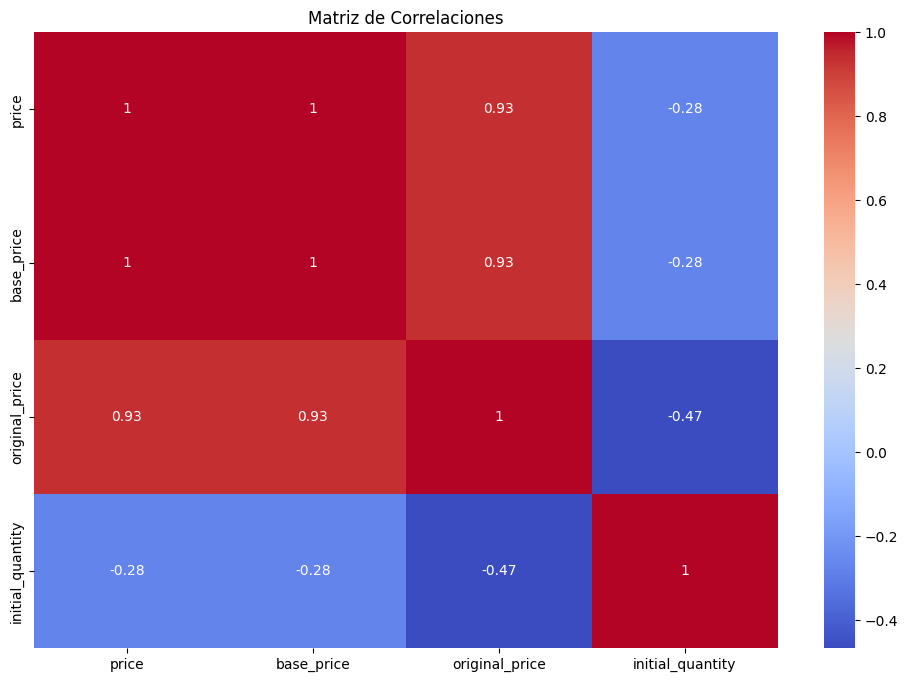

In [29]:
# Filtrar las columnas numéricas
numeric_df = df.drop(columns=['official_store_id', 'seller_id', 'id', 'title', 'category_id', 'condition', 'permalink', 'thumbnail_id', 'thumbnail', 'video_id', 'warranty', 'catalog_product_id', 'domain_id', 'date_created', 'last_updated', 'status']).select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlaciones')
plt.show()


## Precio y cantidad inicial

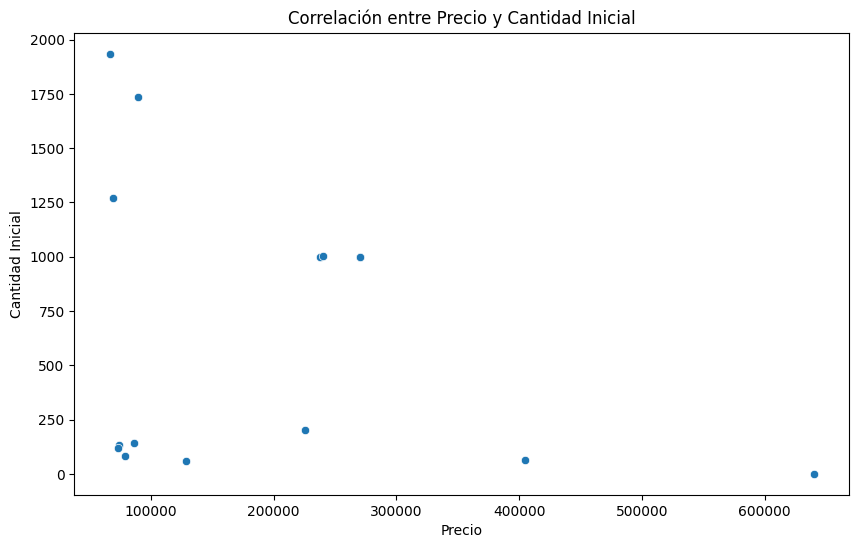

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='initial_quantity', data=df)
plt.title('Correlación entre Precio y Cantidad Inicial')
plt.xlabel('Precio')
plt.ylabel('Cantidad Inicial')
plt.show()
